<a href="https://colab.research.google.com/github/Kexue-Charlene/INDE577/blob/main/Supervised%20Learning/Ensemble%20learning%20%20and%20Random%20forest/Ensemble_learning_and_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble machine learning

In the world of machine learning, it is full of different levels of algorithms. However, when applying these algorithms, something is missing with data due to it being bias or variance or noise in data. We are able to find the variance or loss in the result, but unable to find a good accuracy. We can use ensemble machine learning to deal with these problems. 

Ensemble learning combines several tree base algorithms which construct a better predictive performance than a single tree base algorithm. The main principle of ensemble model is that several weak learners combined together to form a strong learner resulting in an increasing accuracy model. 

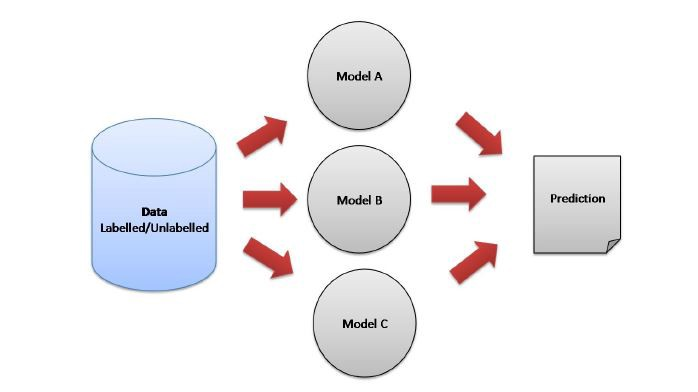
 

# Ensemble learning Types
Ensemble algorithems is divided into three main categoty:
* Bagging
* Boosting
* Stacking 
For each of them, they have different way to use. The details list below:
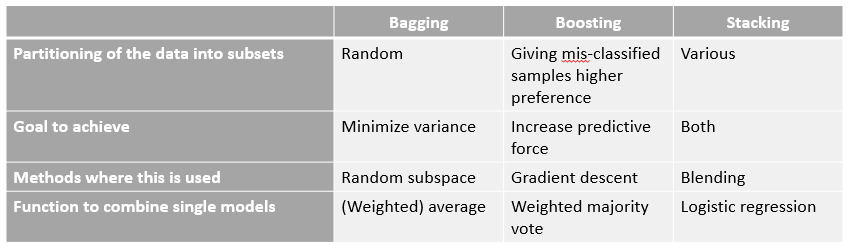

# Random forest 
Random forest classifier is an ensemble tree-based learning algorithm. It is a set of decision trees from a randomly selected subset of the training set. The votes were aggregated from different decision trees to decide the final class of the test object. 
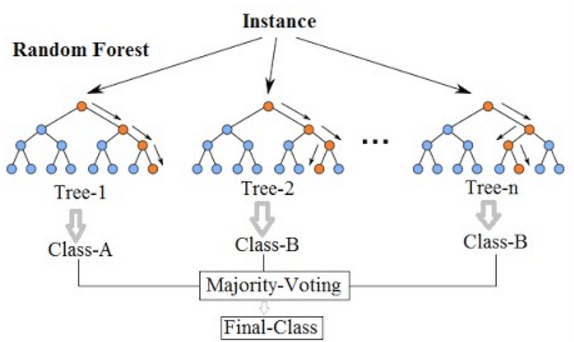

The following packages will be used in this project:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   seaborn: [documentation](https://seaborn.pydata.org/)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline 

## Dataset information
The dataset is downloaded from kaggle. The "target" variable refers to the presence of heart disease. It is integer valued 0 means no/less chance of heart attack and 1 means more chance of heart attack. 
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* thalach: maximum heart rate achieved
* oldpeak: ST depression induced by exercise relative to rest
* target: 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df=pd.read_csv("heart attack.csv")
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target
0,63,1,145,233,150,2.3,1
1,37,1,130,250,187,3.5,1
2,41,0,130,204,172,1.4,1
3,56,1,120,236,178,0.8,1
4,57,0,120,354,163,0.6,1


Plot the pairplot of our dataset.

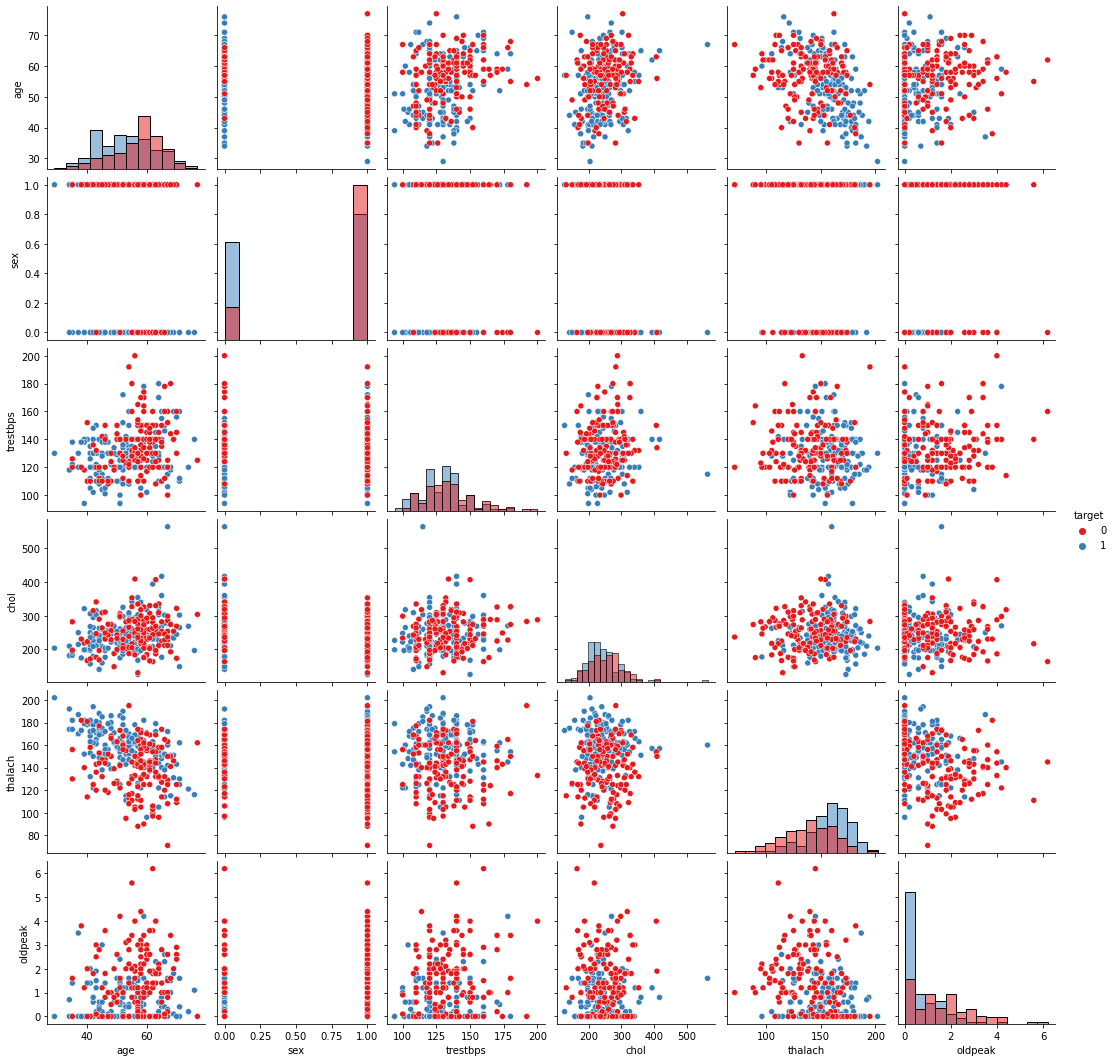

In [ ]:
sns.pairplot(df,hue="target",palette="Set1",diag_kind="hist")
plt.show()

Select "thalach" and "trestbps" variables as X, and "target" variable as y. Let's check the scatter plot below: 

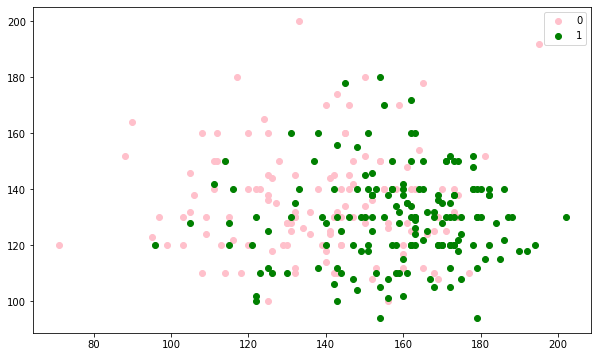

In [ ]:
X = df[["thalach", "trestbps"]].to_numpy()
y = df["target"].to_numpy()
plt.figure(figsize=(10,6))

plt.scatter(X[y==0][:,0],X[y==0][:,1],color="pink",label="0")
plt.scatter(X[y==1][:,0],X[y==1][:,1],color="green",label="1")
plt.legend()

Separated the data into training data and testing data.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=42)

## Ensemble Model
We will use LogisticRegression, MLPClassifier, RandomForestClassifier, VotingClassifier from sklearn to build our ensemble model. Use VotingClassifier to combine three learners. 

In [ ]:
log_clf=LogisticRegression()
mlp_clf=MLPClassifier()
rand_clf=RandomForestClassifier()

voting_clf=VotingClassifier([('lr',log_clf),
                            ('mlp',mlp_clf),
                            ('rf',rand_clf)],voting="hard")

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

Here are the result of three individual models and ensemble model. We can see the MLPClassifier has highest accuracy score. LogisticRegression and VotingClassifier have same value. RandomForestclassifier has the lowest accuracy score. 

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [log_clf,mlp_clf,rand_clf,voting_clf]:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f'{clf.__class__.__name__},accuracy score={accuracy_score(y_test,y_pred)}')

LogisticRegression,accuracy score=0.7540983606557377
MLPClassifier,accuracy score=0.7704918032786885
RandomForestClassifier,accuracy score=0.6065573770491803
VotingClassifier,accuracy score=0.7540983606557377


## More information
Next, I added classificatoin report of all models. The percision, recall, f1-score, and support are able to view. 

In [ ]:
log_reg=LogisticRegression()
mlp=MLPClassifier()
decision_tree=DecisionTreeClassifier(max_depth=3,random_state=42)

log_reg.fit(X_train,y_train)
mlp.fit(X_train,y_train)
decision_tree.fit(X_train,y_train)

print("descision tree")
print(metrics.classification_report(y_test,decision_tree.predict(X_test)))
print("")

print("logistic regression")
print(metrics.classification_report(y_test,log_reg.predict(X_test)))
print("")

print("mlp classifier")
print(metrics.classification_report(y_test,mlp.predict(X_test)))
print("")

clf = VotingClassifier(estimators=[('log_reg', log_reg), ('mlp', mlp), 
                                   ('decision_tree', decision_tree)], voting='hard')
clf.fit(X_train,y_train)
print("Hard-Vote classifier")
print(metrics.classification_report(y_test,clf.predict(X_test)))

descision tree
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


logistic regression
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


mlp classifier
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.7

# Bagging
In bagging, a random sample of data in a training set is selected with replacement which means the individual data points can be chosen more than once. 
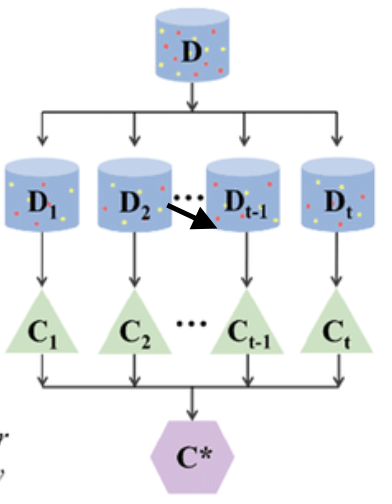
* step1: create multiple data sets through random sampling with replacement
* step2: build multiple learners in parrallel
* step3: combine all learners using an averaging or majority-vote strategy

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500,
                         max_samples=100,
                         bootstrap=True,
                         n_jobs=-1)

In [ ]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [ ]:
y_pred=bag_clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.6721311475409836

The accuracy 67% is not bad compared with other three models, but it is lower than Hard-vote classifier. 

# References:
ResearchGate GmbH, 2008-2021,https://www.researchgate.net/figure/Illustrations-of-A-bagging-and-B-boosting-ensemble-algorithms_fig4_334404567

Afroz,Chakure. "Random Forest Classification" Start it up, Jul 6.2019,https://medium.com/swlh/random-forest-classification-and-its-implementation-d5d840dbead0

Ashish,Patel. "Ensemble Learning- The heart of Machine learning" May 15.2019, https://medium.com/ml-research-lab/ensemble-learning-the-heart-of-machine-learning-b4f59a5f9777